<h1>Step 3 Climate Analysis and Exploration</h1>

In [1]:
# Import SQL Alchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#create hawaii engine
engine = create_engine('sqlite:///hawaii.sqlite')

In [3]:
#map base to schema
Base = automap_base()

In [4]:
#Reflect
Base.prepare(engine, reflect=True)

In [5]:
#create session
session = Session(bind=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
#create query classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
#start session
session = Session(engine)

In [9]:
#query all dates
date_result = session.query(Measurement.date).all()

In [10]:
#query all precipitation
prcp_result = session.query(Measurement.prcp).all()

In [11]:
#find when the data ends in order to calculate when the past 12 months were
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
#query for entire last year of available data
year_begin_date = '2016-08-22'
year_end_date = '2017-08-23'

In [13]:
#create query for the year
month_range = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= year_begin_date).filter(Measurement.date <= year_end_date).all()

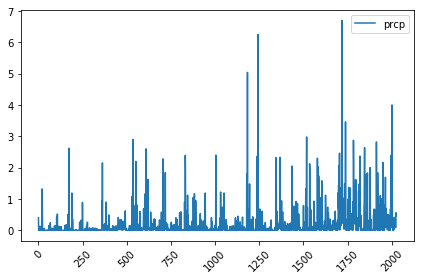

In [14]:
#plot of year's precip
precip_year_df = pd.DataFrame(month_range, columns=['date','prcp'])
#precip_year_df.set_index('date', inplace=True)
precip_year_df.plot(x_compat=True)
plt.xticks(rotation='45')
plt.tight_layout()
plt.savefig('../png/year_precip.png')
#fix xticks

In [15]:
#print statistics for the year
precip_year_df.describe()

prcp
count  2026.000000
mean      0.179437
std       0.463989
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [16]:
#choose a vacation date when it's more likely to be raining data does not date back far enough for me to plan a vacation this year
vacay_begin_date =  dt.datetime(2017,12,6) - dt.timedelta(days=365)
vacay_end_date = dt.datetime(2017,12,13) - dt.timedelta(days=365)

In [17]:
#create query for desired vacation dates
vacay_range = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= vacay_begin_date).filter(Measurement.date <= vacay_end_date).all()

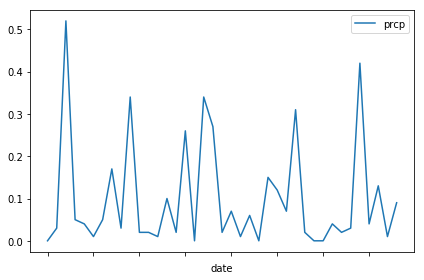

In [18]:
#plot of vacation's precip
precip_vacay_df = pd.DataFrame(vacay_range, columns=['date','prcp'])
precip_vacay_df.set_index('date', inplace=True)
precip_vacay_df.plot(x_compat=True)
plt.xticks(rotation='45')
plt.tight_layout()
plt.savefig('../png/vacation_precip.png')
#fix xticks

In [19]:
# vacation precipitation statistics
precip_vacay_df.describe()

prcp
count  39.000000
mean    0.099744
std     0.131399
min     0.000000
25%     0.020000
50%     0.040000
75%     0.125000
max     0.520000

In [20]:
#find out how many stations there are
session.query(func.count(Station.station)).all()

[(9)]

In [21]:
#tally the number of readings taken by each station to find the highest reporting station
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [22]:
#create query and filter for the station with the highest number of recordings for the last year of data provided
high_station = session.query(Measurement.tobs).filter(Measurement.date >= year_begin_date).filter(Measurement.date <= year_end_date).filter(Measurement.station == 'USC00519281').all()

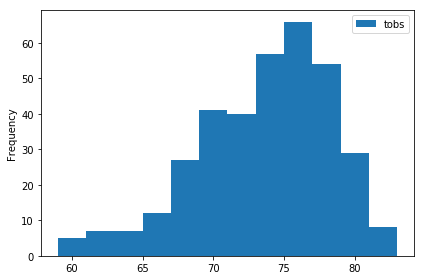

In [23]:
#histogram of the highest reporting station's readings of temperatures
high_station_df= pd.DataFrame(high_station, columns=['tobs'])
high_station_df.plot.hist(bins=12)
plt.tight_layout()
plt.savefig('../png/station_tobs.png')

In [24]:
# create a function to find the min, max, and average temperatures for your chosen vacation dates
def calc_temps(start_date = dt.datetime(2016,12, 6),end_date = dt.datetime(2016,12,13)):
    results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return results[0]

In [25]:
# checking function functionality
calc_temps()

(65.0, 78.0, 69.94871794871794)

In [26]:
# create a list for plotting
temps_list = list(calc_temps(vacay_begin_date,vacay_end_date))

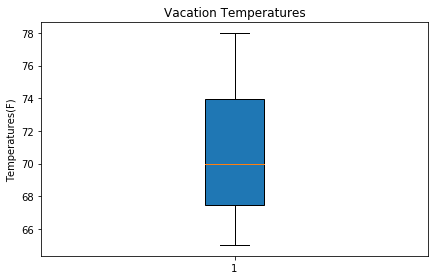

In [27]:
#create bar plot of data acquired from function
fig, ax = plt.subplots()

x = range(len(temps_list))
ax.boxplot(temps_list, patch_artist=True)
ax.set_title('Vacation Temperatures')
fig.tight_layout()
plt.ylabel('Temperatures(F)')
plt.savefig('../png/vacay_temps.png')